# PE06 Hrishikesh Vaze
### DWDM Decision Tree Part A

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import  tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
# load iris data
df = pd.read_csv('./iris.data')
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.shape

(149, 5)

In [4]:
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['species'])
df = df.drop('species', axis=1)
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0


In [5]:
# split
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
classifier = tree.DecisionTreeClassifier(random_state=0)
classifier = classifier.fit(df.drop('class', axis=1), df['class'])

In [7]:
print(tree.export_text(classifier))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



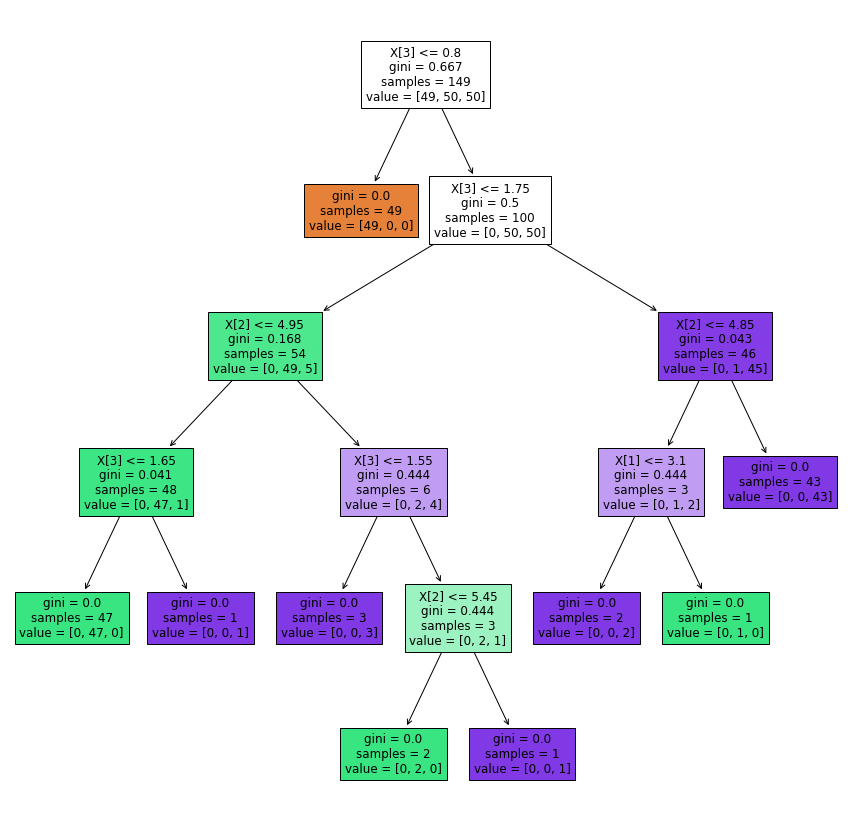

In [8]:
plt.figure(figsize=(15,15))
tree.plot_tree(classifier, filled=True)
plt.show()

In [9]:
# printing confusion matrix
y_pred = classifier.predict(df.drop('class', axis=1))
print(confusion_matrix(df['class'], y_pred))

[[49  0  0]
 [ 0 50  0]
 [ 0  0 50]]
